# Visualize Result of PHILHARMONIC Analysis

Lorem ipsum dolor...

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
from matplotlib import pyplot as plt
from loguru import logger

from philharmonic.utils import (
    load_cluster_json,
    parse_GO_map,
    parse_GO_database,
    print_cluster,
    plot_cluster,
)

In [2]:
# Initial Files
cluster_file_path = "/home/ssledzieski/philharmonic_results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_clusters.functional.json"
network_file_path = "/home/ssledzieski/philharmonic_results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_network.positive.tsv"
go_map_path = "/home/ssledzieski/philharmonic_results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_GO_map.csv"

GO_DATABASE = "/home/ssledzieski/philharmonic_results/p_damicornis/20240917-pdamAll-phil_v0.3.0/go.obo"

In [3]:
clusters = load_cluster_json(cluster_file_path)
full_G = nx.read_weighted_edgelist(network_file_path)
go_map = parse_GO_map(go_map_path)
go_database = parse_GO_database(GO_DATABASE)

---

## Basic Network Statistics

In [4]:
label = ["Nodes", "Edges", "Degree (Med)", "Degree (Avg)", "Sparsity"]
degrees = [i[1] for i in list(full_G.degree())]
value = [
    len(full_G.nodes),
    len(full_G.edges),
    np.median(degrees),
    np.mean(degrees),
    len(full_G.edges()) / len(full_G) ** 2,
]
df = pd.DataFrame([label, value]).T
df.columns = ["", "Network"]
df = df.set_index("")
df

,Network
,
Nodes,8960
Edges,455490
Degree (Med),37.0
Degree (Avg),101.671875
Sparsity,0.005674


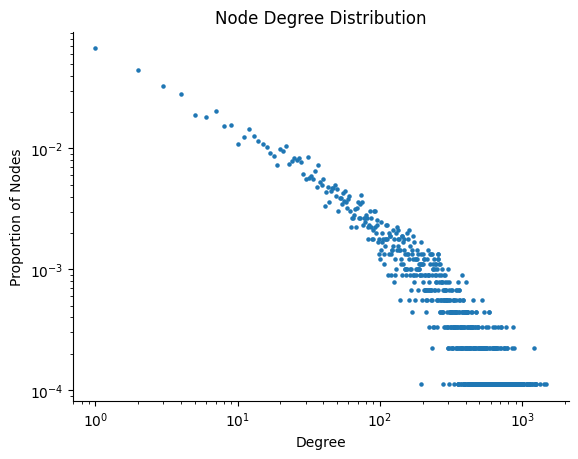

In [5]:
degreeDist = {}
for i in degrees:
    n = degreeDist.setdefault(i, 0)
    degreeDist[i] = n + 1

plt.scatter(degreeDist.keys(), [i / len(full_G) for i in degreeDist.values()], s=5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree")
plt.ylabel("Proportion of Nodes")
plt.title("Node Degree Distribution")
sns.despine()

---

## Basic Cluster Statistics

In [6]:
logger.info(f"Number of clusters: {len(clusters)}")

2024-09-26 14:22:30.340 | INFO     | __main__:<module>:1 - Number of clusters: 610


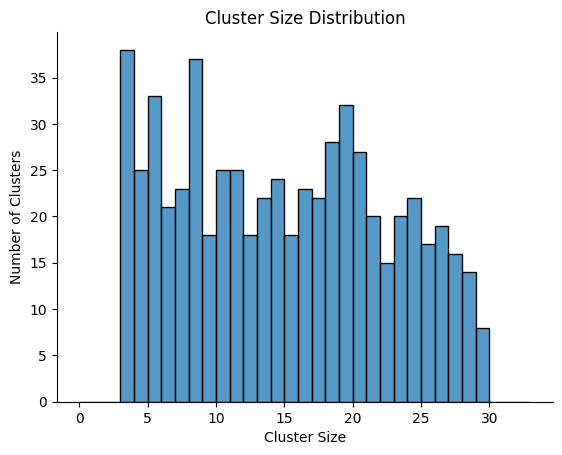

In [7]:
sizes = [len(i["members"]) for i in clusters.values()]
sns.histplot(sizes, bins=np.arange(0, max(sizes) + 5, max(sizes) // 20))
plt.xlabel("Cluster Size")
plt.ylabel("Number of Clusters")
plt.title("Cluster Size Distribution")
sns.despine()
plt.show()

---

## View Individual Clusters

In [8]:
i = 300
k = list(clusters.keys())[i]

In [9]:
print_cluster(clusters[k], go_database, 5)

Cluster of 15 proteins [pdam_00002749-RA, pdam_00022926-RA, pdam_00017090-RA, ...] (hash 2065650738990954842)
0 proteins re-added by ReCIPE (degree, 0.75)
Edges: 98
Triangles: 372
Max Degree: 14
Top Terms:
		GO:0009447 - <putrescine catabolic process> (14)
		GO:0017196 - <N-terminal peptidyl-methionine acetylation> (14)
		GO:0060358 - <obsolete negative regulation of L-leucine import> (14)
		GO:0006348 - <subtelomeric heterochromatin formation> (14)
		GO:0018003 - <peptidyl-lysine N6-acetylation> (14)



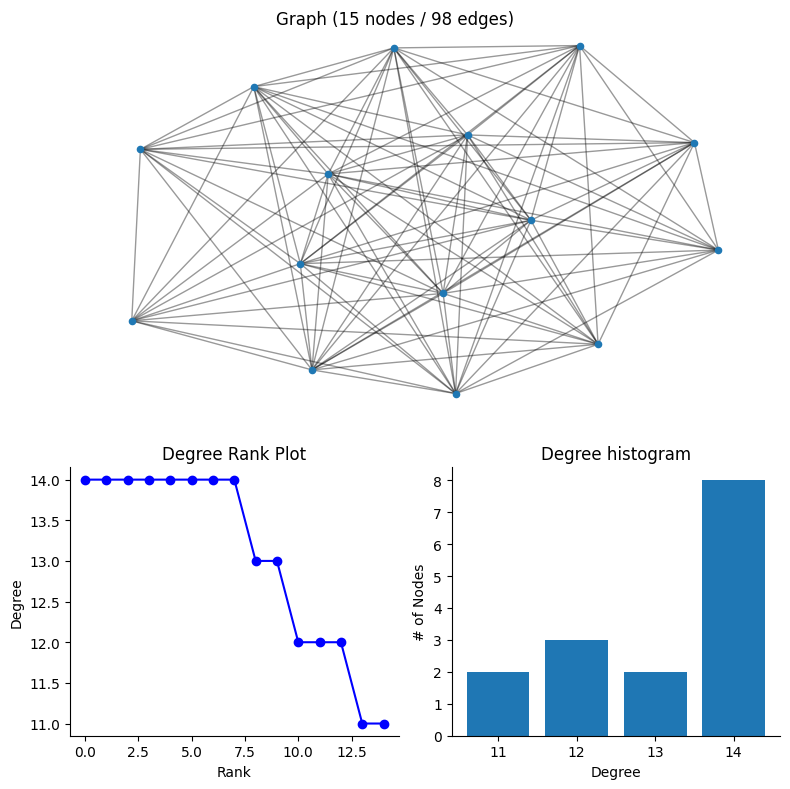

In [10]:
plot_cluster(clusters[k], full_G, savefig="../img/readme_sample_cluster.jpg")